This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

[Thirteen (13) clinical features:](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1)

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

This dataset was downloaded from [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

Citation Request:

- Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020)

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and analyzing the dataset 

In [2]:
heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart.shape

(299, 13)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Visual analysis 

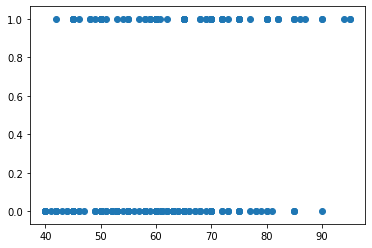

In [5]:
plt.scatter(x="age", y="DEATH_EVENT", data=heart)
plt.show()

While more older people have died based on this dataset, there doesnt appear to be a significant relation of age with death.

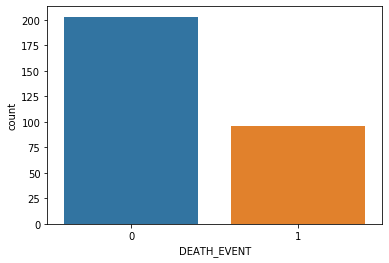

In [6]:
sns.countplot(x="DEATH_EVENT", data=heart)
plt.show()

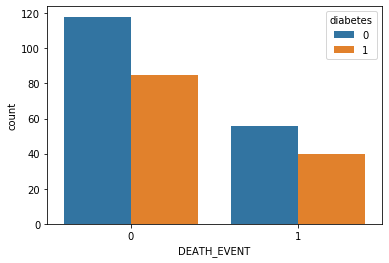

In [7]:
sns.countplot(x="DEATH_EVENT", data=heart, hue="diabetes")
plt.show()

Among both alive and dead patients, patients with diabetes were less than those without diabetes.

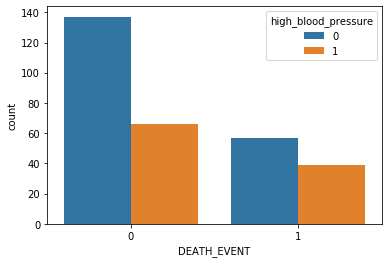

In [8]:
sns.countplot(x="DEATH_EVENT", data=heart, hue="high_blood_pressure")
plt.show()

Same conclusion as the previous graph.

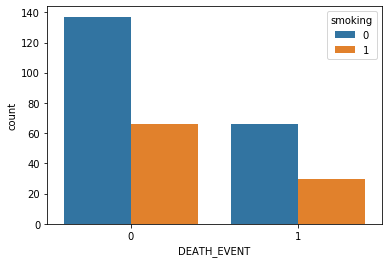

In [9]:
sns.countplot(x="DEATH_EVENT", data=heart, hue="smoking")
plt.show()

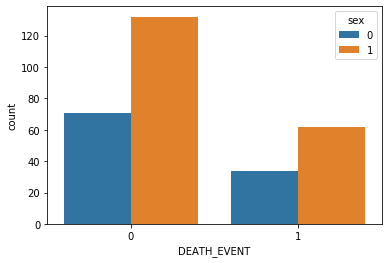

In [10]:
sns.countplot(x="DEATH_EVENT", data=heart, hue="sex")
plt.show()

There were more men than women in both categories.

## Data Split 

### Importing libraries 

In [11]:
from sklearn.model_selection import train_test_split

### Performing data split 

In [12]:
X = heart.drop("DEATH_EVENT", axis=1)  # independent features
y = heart["DEATH_EVENT"]  # target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)

(239, 12) (239,)


In [14]:
print(X_test.shape, y_test.shape)

(60, 12) (60,)


## Logistic Regression Model 

### Importing libraries 

In [15]:
from sklearn.linear_model import LogisticRegression

### Building the training model 

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = model.predict(X_test)

## Evaluation of the model 

### Importing libraries 

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.75      0.50      0.60        18

    accuracy                           0.80        60
   macro avg       0.78      0.71      0.73        60
weighted avg       0.79      0.80      0.79        60



In [20]:
print(accuracy_score(y_test, y_pred))

0.8


Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.In this prediction case, when the Logistic Regression model predicted patients are going to die from heart failure, that patients die ()% of the time.
- Precision:- Accuracy of positive predictions.
- Precision = TP/(TP + FP)

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.If there are patients who die due to heart failure in the test set and your Logistic Regression model can identify it ()% of the time.
- Recall:- Fraction of positives that were correctly identified.
- Recall = TP/(TP+FN)

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

From [the article](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

The high F1 score and accuracy attests to the good fit of the model. 

In [21]:
print(confusion_matrix(y_test, y_pred))

[[39  3]
 [ 9  9]]


Explanation of confusion matrix
![](https://miro.medium.com/max/2560/1*VSchph99Wiv6tQpNIvMJbw.png) 

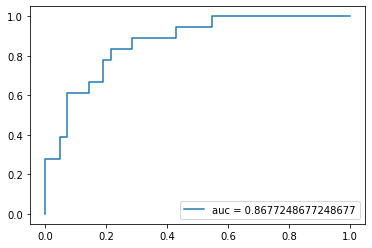

In [22]:
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc = " + str(auc))
plt.legend(loc=4)
plt.show()

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

- AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.